In [278]:
%matplotlib inline

import seaborn as sns
import pickle

import numpy as np
import scipy as sp
import nibabel as nib
import pandas as pd
import cv2
import numpy.ma as ma

from matplotlib import pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
from mpl_toolkits.mplot3d import Axes3D
from PIL import Image
from scipy import misc
from scipy.cluster.hierarchy import dendrogram
from scipy import ndimage
from scipy import signal
from sklearn.datasets import load_iris
from scipy import stats
from collections import Counter

from sklearn import datasets
from sklearn import metrics
from sklearn.cluster import *
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
from sklearn.feature_extraction.image import grid_to_graph
from sklearn.metrics import silhouette_samples, silhouette_score, pairwise_distances
from sklearn.metrics import davies_bouldin_score


sns.set(font_scale=1.4)
sns.set_style("whitegrid", {'axes.grid' : False})

In [279]:
np.set_printoptions(threshold=np.inf)

In [280]:
nibfile = nib.load("/Users/hanam/Documents/Tracts_testing_2/all_levels/Template_metric_5.nii.gz")
data = nibfile.get_data()

In [281]:
data.shape

(151, 151, 31)

In [282]:
def crop_center(img,cropx,cropy):
    y,x = img.shape
    startx = x//2-(cropx//2)
    starty = y//2-(cropy//2)    
    return img[starty:starty+cropy,startx:startx+cropx]

In [283]:
feature_names = [
    "number_axons",
    "axon_equiv_diameter",
    "avf",
    "g_ratio",
    "myelin_thickness",
    "mvf",
]

In [284]:
# data = data.transpose((1, 0, 2, 3))

# # Ignore solidity, eccent., orient., etc.
# #data = data[..., 0:6]
# data = data.squeeze(axis=2)

In [285]:
original_shape = data.shape[0:2]

print original_shape

(151, 151)


In [286]:
h1= 35
h2= 115
w1= 35
w2= 120

In [287]:
def colorbar(mappable):
    ax = mappable.axes
    fig = ax.figure
    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size="30%", pad=0.05)

    
    return fig.colorbar(mappable, cax=cax)

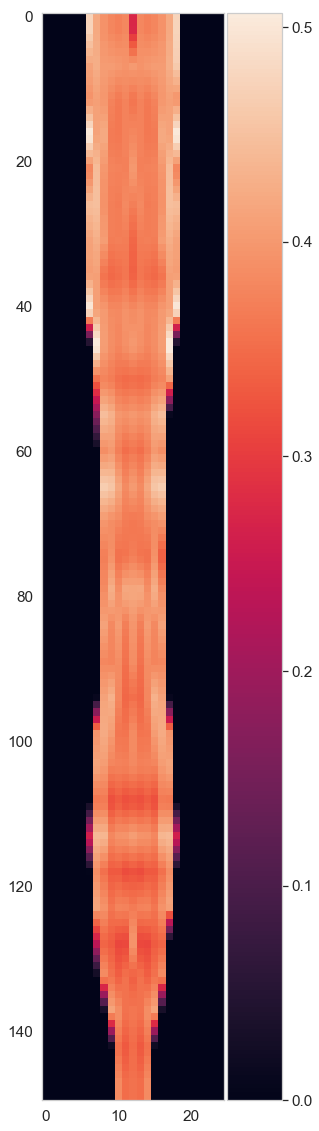

In [288]:
#for i in range(data.shape[0]):
fig= plt.figure(figsize=(20,20))
img= plt.imshow(cv2.resize(data[:,75,:].T,(25,150)))
colorbar(img)



In [289]:
def crop_center(img,cropx,cropy):
    y,x = img.shape
    startx = x//2-(cropx//2)
    starty = y//2-(cropy//2)    
    return img[starty:starty+cropy,startx:startx+cropx]

In [290]:
h1= 35
h2= 115
w1= 35
w2= 120

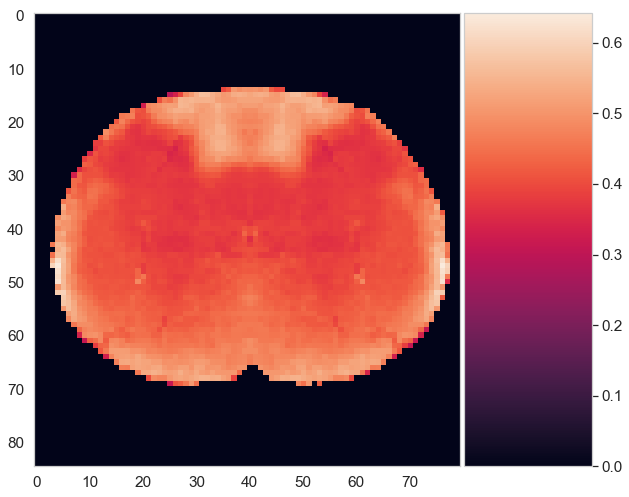

In [291]:
im_crop= crop_center(data[..., 2], w2-w1, h2-h1)

fig= plt.figure(figsize=(10,10))
img= plt.imshow(np.rot90(im_crop, 1, (0,1)))
colorbar(img)
